In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("DC political contributions.csv")
df.columns = df.columns.str.lower()
df.head()

,committee name,candidate name,contributor,address,city,state,zip,contributor type,contribution type,employer name,employer address,amount,date of receipt
0,Committee to Elect Ray Browne,Ray Browne,"Barron, Edward","4743 Massachusetts Avenue, N.W.",Washington,DC,20016,Individual,',None,NaN,$25.00,9/26/2000
1,Committee to Elect Ray Browne,Ray Browne,"Carroll, Sara","1239 Potomac Street, NW",Washington,DC,20007,Individual,',None,NaN,$150.00,9/25/2000
2,"""CHAVOUS FOR MAYOR""",NaN,"Gohn, Herman",24228 Preakness Drive,Damascus,MD,20872,Individual,',NaN,NaN,$100.00,3/25/1999
3,"""CHAVOUS FOR MAYOR""",NaN,"Buttinelli, A.","1801 Connecticut Ave., N.W.",Washington,DC,20007,Individual,',NaN,NaN,$100.00,3/25/1999
4,"""CHAVOUS FOR MAYOR""",NaN,"Cullinance, Maurice","666 11th Street, N.W., Suite 300",Washington,DC,20001,Individual,',Cullinance & Associates,NaN,"$1,000.00",6/30/1999


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146112 entries, 0 to 146111
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   committee name     146112 non-null  object
 1   candidate name     145349 non-null  object
 2   contributor        146112 non-null  object
 3   address            145518 non-null  object
 4   city               145826 non-null  object
 5   state              145675 non-null  object
 6   zip                145347 non-null  object
 7   contributor type   146108 non-null  object
 8   contribution type  146111 non-null  object
 9   employer name      81210 non-null   object
 10  employer address   81915 non-null   object
 11  amount             146112 non-null  object
 12  date of receipt    146112 non-null  object
dtypes: object(13)
memory usage: 14.5+ MB


In [4]:
df.rename(columns={"date of receipt": "date"}, inplace = True)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['contributor type'] = df['contributor type'].astype(str)

df['amount'] = df['amount'].str.replace('$', '')
df['amount'] = df['amount'].str.replace(',', '')
df['amount'] = df['amount'].str.replace('(', '')
df['amount'] = df['amount'].str.replace(')', '')
df['amount'] = df['amount'].astype(float)

df.info()

C:\Users\Matt\AppData\Local\Temp\ipykernel_5168\2068485356.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['amount'] = df['amount'].str.replace('$', '')
C:\Users\Matt\AppData\Local\Temp\ipykernel_5168\2068485356.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['amount'] = df['amount'].str.replace('(', '')
C:\Users\Matt\AppData\Local\Temp\ipykernel_5168\2068485356.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['amount'] = df['amount'].str.replace(')', '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146112 entries, 0 to 146111
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   committee name     146112 non-null  object        
 1   candidate name     145349 non-null  object        
 2   contributor        146112 non-null  object        
 3   address            145518 non-null  object        
 4   city               145826 non-null  object        
 5   state              145675 non-null  object        
 6   zip                145347 non-null  object        
 7   contributor type   146112 non-null  object        
 8   contribution type  146111 non-null  object        
 9   employer name      81210 non-null   object        
 10  employer address   81915 non-null   object        
 11  amount             146112 non-null  float64       
 12  date               146112 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(11)

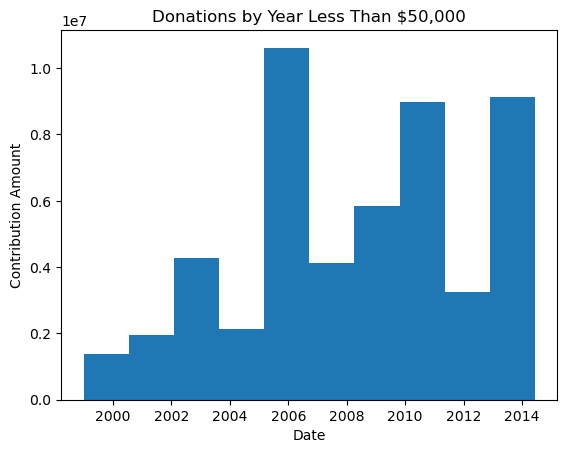

In [6]:
plt.hist(df['date'], bins=10, weights=df['amount'])

plt.xlabel('Date')
plt.ylabel('Contribution Amount')
plt.title('Donations by Year Less Than $50,000')

plt.show()

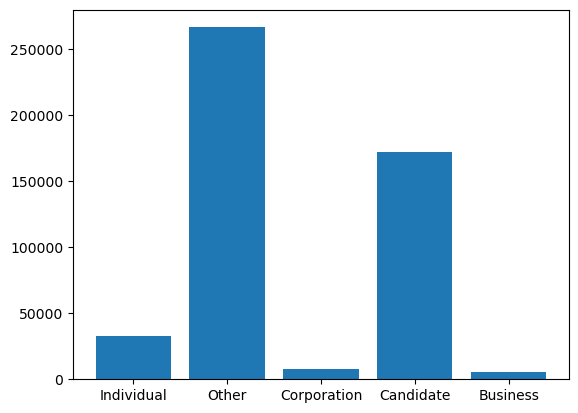

In [8]:
top_contributor_types = df.groupby('contributor type')['amount'].sum().nlargest(5).index

filt_df = df[df['contributor type'].isin(top_contributor_types)]

plt.bar(filt_df['contributor type'], filt_df['amount'])
plt.show()

In [31]:
df.groupby('candidate name')['amount'].sum().nlargest(5)

candidate name
Adrian M Fenty          9150434.49
Vincent C Gray          4980872.32
Jack Evans              2901149.89
Linda  W Cropp          2783125.38
Anthony A. Williams     2777202.90
Name: amount, dtype: float64

C:\Users\Matt\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Matt\AppData\Local\Temp\ipykernel_5168\4117014290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_amount'] = np.log10(filtered_df['amount'])


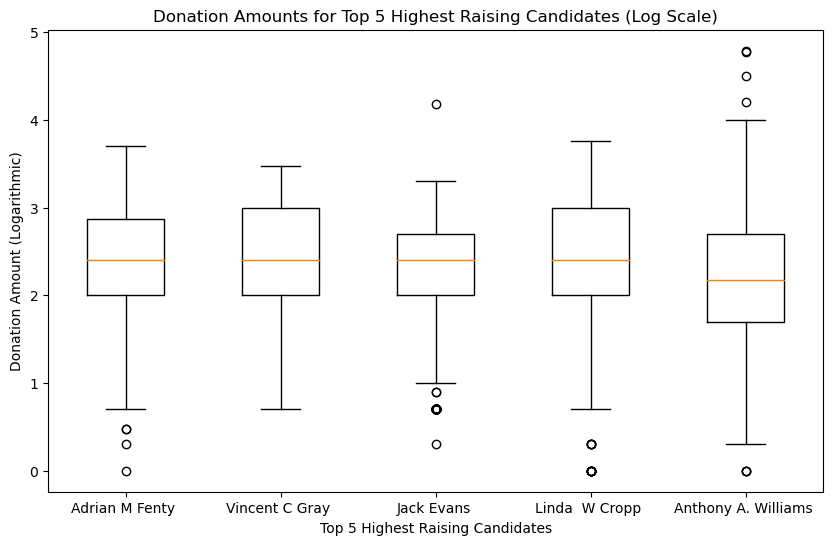

In [35]:
top_candidates = df.groupby('candidate name')['amount'].sum().nlargest(5).index

filtered_df = df[df['candidate name'].isin(top_candidates)]

filtered_df['log_amount'] = np.log10(filtered_df['amount'])

plt.figure(figsize=(10, 6))

plt.boxplot(filtered_df.groupby('candidate name')['log_amount'].apply(list))
plt.xticks(range(1, len(top_candidates) + 1), top_candidates)
plt.xlabel('Top 5 Highest Raising Candidates')
plt.ylabel('Donation Amount (Logarithmic)')
plt.title('Donation Amounts for Top 5 Highest Raising Candidates (Log Scale)')
plt.show()